# Exercise 5.1 - Solution


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

**Simple Network**

We continue with the dataset first encountered in the previous exercise. Please refer to the discussion there for an introduction to the data and the learning objective.

Here, we manually implement a simple network architecture

In [ ]:
# The code snippet below is responsible for downloading the dataset
# - for example when running via Google Colab.
#
# You can also directly download the file using the link if you work
# with a local setup (in that case, ignore the !wget)

!wget https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv

--2022-09-27 19:08:52--  https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 264426 (258K) [application/x-httpd-php]
Saving to: ‘winequality-white.csv.2’

winequality-white.c 100%[===================>] 258.23K   499KB/s    in 0.5s    

2022-09-27 19:08:53 (499 KB/s) - ‘winequality-white.csv.2’ saved [264426/264426]



In [ ]:
# Before working with the data, 
# we download and prepare all features

# load all examples from the file
data = np.genfromtxt('winequality-white.csv',delimiter=";",skip_header=1)

print("data:", data.shape)

# Prepare for proper training
np.random.shuffle(data) # randomly sort examples

# the performance can be increased by normalizing the data per feature
# Normalize
mean = np.mean(data, axis=0)
std = np.std(data, axis = 0)
print(mean.shape)

data = (data - mean)/std

# take the first 3000 examples for training
# (remember array slicing from last week)
X_train = data[:3000,:11] # all features except last column
y_train = data[:3000,11]  # quality column

# and the remaining examples for testing
X_test = data[3000:,:11] # all features except last column
y_test = data[3000:,11] # quality column

print("First example:")
print("Features:", X_train[0])
print("Quality:", y_train[0])

data: (4898, 12)
(12,)
First example:
Features: [ 0.527639   -0.18099175 -0.03463842  1.06645815  0.51395124  0.74634612
 -0.26734905  0.97058182 -0.58460464  0.527131   -0.41793512]
Quality: 0.13787014016904114


# Solutions

The goal is to implement the training of a neural network with one input layer, one hidden layer, and one output layer using gradient descent. We first (below) define the matrices and initialise with random values. We need W, b, W' and b'. The shapes will be:
  * W: (number of hidden nodes, number of inputs) named `W`
  * b: (number of hidden nodes) named `b`
  * W': (number of hidden nodes) named `Wp`
  * b': (one) named `bp`

Your tasks are:     
   * Implement a forward pass of the network as `dnn` (see below)
   * Implement a function that uses one data point to update the weights using gradient descent. You can follow the `update_weights` skeleton below
   * Now you can use the code below (training loop and evaluation) to train the network for multiple data points and even over several epochs. Try to find a set of hyperparameters (number of nodes in the hidden layer, learning rate, number of training epochs) that gives stable results. What is the best result (as measured by the loss on the training sample) you can get?

In [ ]:
# Initialise weights with suitable random distributions
hidden_nodes = 50 # number of nodes in the hidden layer
n_inputs = 11 # input features in the dataset


W = np.random.randn(hidden_nodes,11)*np.sqrt(2./n_inputs)
# b = np.random.randn(hidden_nodes)*np.sqrt(2./n_inputs)
b = np.zeros(hidden_nodes)
Wp = np.random.randn(hidden_nodes)*np.sqrt(2./hidden_nodes)
bp = np.zeros(1)

print(W.shape)

(50, 11)


In [ ]:
# You can use this implementation of the ReLu activation function
def relu(x):
    return np.maximum(x, 0)

In [ ]:
def dnn(x,W,b,Wp,bp):
    # SOLUTION
    # sum_i W'_ki*Relu(sum_j W_ij*x_j + b_i) + b'_k 
    return np.dot(Wp, relu(np.dot(W,x) + b)) + bp

In [ ]:
def update_weights(x,y, W, b, Wp, bp):
    
    lr = 0.00005

    # SOLUTION

    # Calculate the network output
    phi = dnn(x,W,b,Wp,bp)

    # Use the formulas derived to calculate the gradient for each of W,b,Wp,bp
    delta_bp = 2 * (phi - y)
    delta_Wp = 2 * (phi - y) * relu(np.dot(W,x) + b)
    delta_b  = 2 * (phi - y) * Wp * np.heaviside(np.dot(W,x) + b, 0.5)
    delta_W  = 2 * (phi - y) * np.outer(Wp * np.heaviside(np.dot(W,x) + b, 0.5), x)
                
    # Update the weights/bias following the rule:  X_new = X_old - learning_rate * gradient    
    bp -= lr * delta_bp
    Wp -= lr * delta_Wp
    b  -= lr * delta_b
    W  -= lr * delta_W
    return W, b, Wp, bp  # it is cleaner to explicitely return the new weights. 

# Training loop and evaluation below

In [ ]:
# The code below implements the training.
# If you correctly implement  dnn and update_weights above, 
# you should not need to change anything below. 
# (apart from increasing the number of epochs)

train_losses = []
test_losses = []

# How many epochs to train
n_epochs = 200

# Loop over the epochs
for ep in range(n_epochs):
        
    # Each epoch is a complete over the training data
    for i in range(X_train.shape[0]):
        
        # pick one example
        x = X_train[i]
        y = y_train[i]

        # use it to update the weights
        W, b, Wp, bp = update_weights(x,y, W, b, Wp, bp)
    
    # Calculate predictions for the full training and testing sample
    y_pred_train = [dnn(x,W,b,Wp,bp)[0] for x in X_train]
    y_pred = [dnn(x,W,b,Wp,bp)[0] for x in X_test]

    # Calculate aver loss / example over the epoch
    train_loss = sum((y_pred_train-y_train)**2) / y_train.shape[0]
    test_loss = sum((y_pred-y_test)**2) / y_test.shape[0] 
    
    # print some information
    print("Epoch:",ep, "Train Loss:", train_loss, "Test Loss:", test_loss)
    
    # and store the losses for later use
    train_losses.append(train_loss)
    test_losses.append(test_loss)

Epoch: 0 Train Loss: 0.9918851072505133 Test Loss: 0.9437235263946622
Epoch: 1 Train Loss: 0.8539353363070646 Test Loss: 0.8170544596491086
Epoch: 2 Train Loss: 0.8098654285399208 Test Loss: 0.7787141101404811
Epoch: 3 Train Loss: 0.7864232962142866 Test Loss: 0.7590572587870429
Epoch: 4 Train Loss: 0.7700840459173142 Test Loss: 0.7455918718301999
Epoch: 5 Train Loss: 0.7573779537115456 Test Loss: 0.7352238844408449
Epoch: 6 Train Loss: 0.74697031649237 Test Loss: 0.7268195364361066
Epoch: 7 Train Loss: 0.7381950792835916 Test Loss: 0.7197999530174213
Epoch: 8 Train Loss: 0.7306565228947146 Test Loss: 0.7138166894737549
Epoch: 9 Train Loss: 0.7241003580174357 Test Loss: 0.7086470925618911
Epoch: 10 Train Loss: 0.718300241003529 Test Loss: 0.7040884345943976
Epoch: 11 Train Loss: 0.7131303562696022 Test Loss: 0.7000284967978013
Epoch: 12 Train Loss: 0.7085015436380218 Test Loss: 0.6964030081592022
Epoch: 13 Train Loss: 0.7043211639917011 Test Loss: 0.6931453659592702
Epoch: 14 Train Los

In [ ]:
# After the training:
    
# Prepare scatter plot
y_pred = [dnn(x,W,b,Wp,bp)[0] for x in X_test]

# now we need to rescale the output to the correct values
y_pred = (y_pred + mean[11])* std[11]
y_test = (y_test + mean[11])* std[11]
y_pred_train = (y_pred_train + mean[11]) * std[11]
y_train = (y_train + mean[11]) * std[11]

Best loss: 0.641, Final loss: 0.641
Correlation coefficient: 0.578


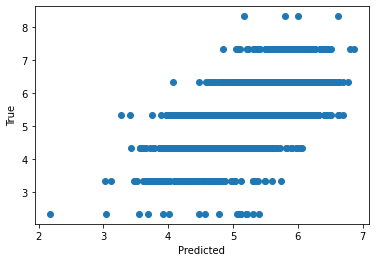

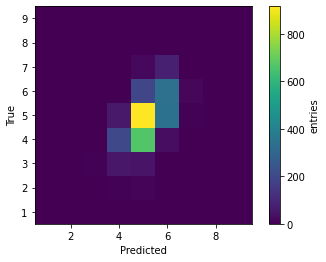

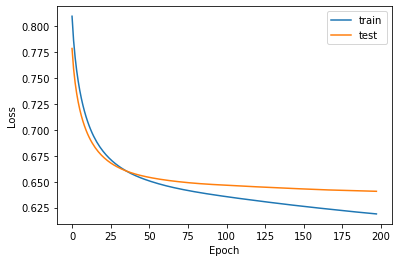

In [ ]:
print(f"Best loss: {min(test_losses):.3f}, Final loss: {test_losses[-1]:.3f}")

print(f"Correlation coefficient: {np.corrcoef(y_pred,y_test)[0,1]:.3f}")
plt.scatter(y_pred_train,y_train)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

fig, ax = plt.subplots(1, 1)
h = ax.hist2d(y_pred_train, y_train, bins=[np.arange(0.5, 10.5, 1),np.arange(0.5, 10.5, 1)])
ax.set_xlabel("Predicted")
ax.set_ylabel("True")
ax.set_aspect("equal")
cbar = fig.colorbar(h[3], ax=ax)
cbar.set_label("entries")
plt.show()

# Prepare and loss over time
plt.plot(train_losses[2:],label="train")
plt.plot(test_losses[2:],label="test") # we omit the first data points as the first loss is typically very high which makes it difficult to read the plot. 
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [ ]:
print(np.max(np.abs(W)), np.average(np.abs(W))) # we see that single weights have a large value. Some regularization L2 norm might help to improve results. 
print(np.max(np.abs(Wp)), np.average(np.abs(Wp)))

1.762779690234602 0.3290683723553038
0.45374070432121316 0.1288382275843679


# Hint 1

We want a network with one hidden layer. As activiation in the hidden layer $\sigma$ we apply element-wise ReLu, while no activation is used for the output layer. The forward pass of the network then reads:
$$\hat{y}=\mathbf{W}^{\prime} \sigma(\mathbf{W} \vec{x}+\vec{b})+b^{\prime}$$

# Hint 2

For the regression problem the objective function is the mean squared error between the prediction and the true label $y$:
$$
L=(\hat{y}-y)^{2}
$$

Taking the partial derivatives - and diligently applying chain rule - with respect to the different objects yields:
\begin{aligned}
\frac{\partial L}{\partial b^{\prime}} &=2(\hat{y}-y) \\
\frac{\partial L}{\partial b_{k}} &=2(\hat{y}-y) \mathbf{W}_{k}^{\prime} \theta\left(\sum_{i} \mathbf{W}_{k i} x_{i}+b_{k}\right) \\
\frac{\partial L}{\partial \mathbf{W}_{k}^{\prime}} &=2(\hat{y}-y) \sigma\left(\sum_{i} \mathbf{W}_{k i} x_{i}+b_{k}\right) \\
\frac{\partial L}{\partial \mathbf{W}_{k m}} &=2(\hat{y}-y) \mathbf{W}_{m}^{\prime} \theta\left(\sum_{i} \mathbf{W}_{m i} x_{i}+b_{m}\right) x_{k}
\end{aligned}

Here, $\Theta$ denotes the Heaviside step function.